## Ensemble methods

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import cv2 
import glob
import os
import pickle
import zipfile
import tensorflow as tf
from tensorflow import keras
sns.set()

In [10]:
!gdown https://drive.google.com/uc?id=1E6LIfRf3UDcIDCgl8ZBI2j0odmvS5c-w

Downloading...
From: https://drive.google.com/uc?id=1E6LIfRf3UDcIDCgl8ZBI2j0odmvS5c-w
To: /content/kaggle_transfer_learning_covid.zip
105MB [00:00, 254MB/s] 


In [ ]:
!unzip -qq kaggle_transfer_learning_covid.zip

In [12]:
# Path of the dataset
data_path = '/content/kaggle_transfer_learning_covid/'
train_dir = os.path.join(data_path,'train')
test_dir = os.path.join(data_path, 'test')

In [ ]:
!pip install unrar
!unrar x DenseNet.rar
!unrar x IRNet.rar
!unrar x ResNet.rar
!unrar x Inception.rar
!unrar x VGG.rar

### Importing the pretrained models and loading the weights

### DenseNet

In [14]:
from tensorflow.keras.applications import DenseNet201
base_model1=DenseNet201(input_shape=[224,224,3],weights='imagenet',include_top=False) 

x1=base_model1.output
base_model1.trainable=False
x11=keras.layers.GlobalAveragePooling2D()(x1)
x21=keras.layers.Dense(512,activation='relu')(x11)
preds1=keras.layers.Dense(3,activation='softmax')(x21) 
DenseNet=keras.models.Model(inputs=[base_model1.input],outputs=[preds1]) #specify the inputs and outputs

with open("/content/DenseNet/x2.txt", "rb") as fp:
  weightsAndBiases_21=pickle.load(fp)
with open("/content/DenseNet/pred.txt", "rb") as fp:
  weightsAndBiases_11=pickle.load(fp)
DenseNet.layers[-1].set_weights(weightsAndBiases_11)
DenseNet.layers[-2].set_weights(weightsAndBiases_21)

DenseNet.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

### InceptionResNet

In [15]:
from tensorflow.keras.applications import InceptionResNetV2
base_model2=InceptionResNetV2(input_shape=[224,224,3],weights='imagenet',include_top=False) 

x2=base_model2.output
base_model2.trainable=False
x12=keras.layers.GlobalAveragePooling2D()(x2)
x22=keras.layers.Dense(512,activation='relu')(x12)
preds2=keras.layers.Dense(3,activation='softmax')(x22) 
IRNet=keras.models.Model(inputs=[base_model2.input],outputs=[preds2]) #specify the inputs and outputs

with open("/content/IRNet/x2.txt", "rb") as fp:
  weightsAndBiases_22=pickle.load(fp)
with open("/content/IRNet/pred.txt", "rb") as fp:
  weightsAndBiases_12=pickle.load(fp)
IRNet.layers[-1].set_weights(weightsAndBiases_12)
IRNet.layers[-2].set_weights(weightsAndBiases_22)

IRNet.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

### ResNet

In [16]:
from tensorflow.keras.applications import ResNet152V2
base_model3=ResNet152V2(input_shape=[224,224,3],weights='imagenet',include_top=False) 

x3=base_model3.output
base_model3.trainable=False
x13=keras.layers.GlobalAveragePooling2D()(x3)
x23=keras.layers.Dense(512,activation='relu')(x13)
preds3=keras.layers.Dense(3,activation='softmax')(x23) 
ResNet=keras.models.Model(inputs=[base_model3.input],outputs=[preds3]) #specify the inputs and outputs

with open("/content/ResNet/x2.txt", "rb") as fp:
  weightsAndBiases_23=pickle.load(fp)
with open("/content/ResNet/pred.txt", "rb") as fp:
  weightsAndBiases_13=pickle.load(fp)
ResNet.layers[-1].set_weights(weightsAndBiases_13)

ResNet.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

### Inception

In [17]:
from tensorflow.keras.applications import InceptionV3
base_model4=InceptionV3(input_shape=[224,224,3],weights='imagenet',include_top=False) 

x4=base_model4.output
base_model4.trainable=False
x14=keras.layers.GlobalAveragePooling2D()(x4)
x24=keras.layers.Dense(512,activation='relu')(x14)
preds4=keras.layers.Dense(3,activation='softmax')(x24) 
Inception=keras.models.Model(inputs=[base_model4.input],outputs=[preds4]) #specify the inputs and outputs

with open("/content/Inception/x2.txt", "rb") as fp:
  weightsAndBiases_24=pickle.load(fp)
with open("/content/Inception/pred.txt", "rb") as fp:
  weightsAndBiases_14=pickle.load(fp)
Inception.layers[-1].set_weights(weightsAndBiases_14)

Inception.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

87916544/87910968 [==============================] - 2s 0us/step


### VGG19

In [18]:
from tensorflow.keras.applications import VGG19
base_model5=VGG19(input_shape=[224,224,3],weights='imagenet',include_top=False) 

x5=base_model5.output
base_model5.trainable=False
x15=keras.layers.GlobalAveragePooling2D()(x5)
x25=keras.layers.Dense(512,activation='relu')(x15)
preds5=keras.layers.Dense(3,activation='softmax')(x25) 
VGG=keras.models.Model(inputs=[base_model5.input],outputs=[preds5]) #specify the inputs and outputs

with open("/content/VGG/x2.txt", "rb") as fp:
  weightsAndBiases_25=pickle.load(fp)
with open("/content/VGG/pred.txt", "rb") as fp:
  weightsAndBiases_15=pickle.load(fp)
VGG.layers[-1].set_weights(weightsAndBiases_15)

VGG.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

80142336/80134624 [==============================] - 0s 0us/step


### Initialising a data generator for each model

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input as dn
# Get your train and test data
dn_train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,preprocessing_function=dn,validation_split=0.1,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)
#train_generator=train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',subset='training',shuffle=True)
dn_val_generator=dn_train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',subset='validation',batch_size=3,shuffle=False)

Found 21 images belonging to 3 classes.


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as ir
# Get your train and test data
ir_train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,preprocessing_function=ir,validation_split=0.1,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)
ir_val_generator=ir_train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',subset='validation',batch_size=3,shuffle=False)

Found 21 images belonging to 3 classes.


In [21]:
from tensorflow.keras.applications.inception_v3 import preprocess_input as i
# Get your train and test data
i_train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,preprocessing_function=i,validation_split=0.1,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)
i_val_generator=i_train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',subset='validation',batch_size=3,shuffle=False)

Found 21 images belonging to 3 classes.


In [22]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input as rn
# Get your train and test data
rn_train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,preprocessing_function=rn,validation_split=0.1,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)
rn_val_generator=rn_train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',subset='validation',batch_size=3,shuffle=False)

Found 21 images belonging to 3 classes.


In [23]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# Get your train and test data
vgg_train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.3,height_shift_range=0.3,shear_range=0.2,preprocessing_function=preprocess_input,validation_split=0.1,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)
vgg_val_generator=vgg_train_datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',subset='validation',batch_size=3,shuffle=False)

Found 21 images belonging to 3 classes.


### Soft-voting classifier

In [24]:
labels=np.array([0.,0.,0.,0.,0.,0.,0.,1.,1.,1.,1.,1.,1.,1.,2.,2.,2.,2.,2.,2.,2.,])

In [25]:
step_size_validation=dn_val_generator.n//dn_val_generator.batch_size
dn_prob=DenseNet.predict(dn_val_generator,steps=step_size_validation)
ir_prob=IRNet.predict(ir_val_generator,steps=step_size_validation)
i_prob=Inception.predict(i_val_generator,steps=step_size_validation)
rn_prob=ResNet.predict(rn_val_generator,steps=step_size_validation)
vgg_prob=VGG.predict(vgg_val_generator,steps=step_size_validation)

In [26]:
stack=np.dstack((dn_prob,ir_prob,i_prob,rn_prob,vgg_prob))
avg_ensemble_prob=np.mean(stack,axis=-1)
avg_ensemble_pred=np.argmax(avg_ensemble_prob,axis=-1)

In [27]:
from sklearn import metrics
print(metrics.classification_report(labels,avg_ensemble_pred,digits=3))

              precision    recall  f1-score   support

         0.0      1.000     0.857     0.923         7
         1.0      1.000     0.714     0.833         7
         2.0      0.700     1.000     0.824         7

    accuracy                          0.857        21
   macro avg      0.900     0.857     0.860        21
weighted avg      0.900     0.857     0.860        21



### Confusion matrix

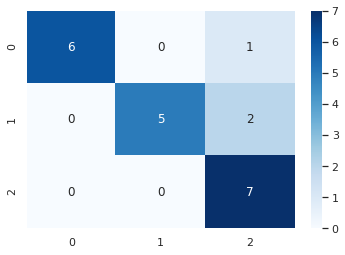

In [28]:
cm=metrics.confusion_matrix(labels,avg_ensemble_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

### ROC curves

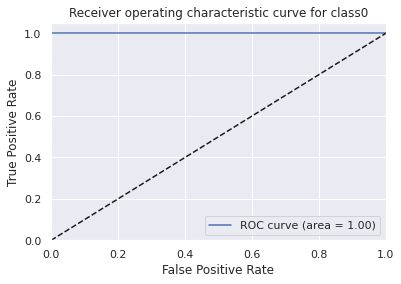

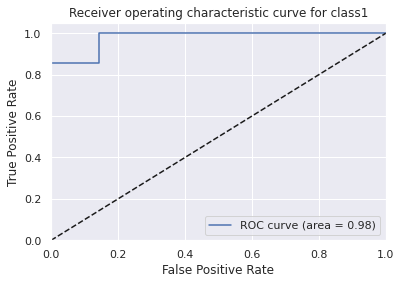

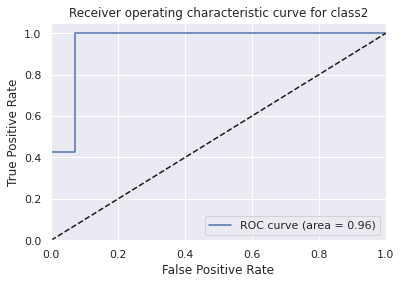

In [29]:
from sklearn.preprocessing import label_binarize
y_true = label_binarize(labels,classes=[0,1,2])

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_true[:, i], avg_ensemble_prob[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for class'+str(i))
    plt.legend(loc="lower right")
    plt.show()

### Precision-Recall curves

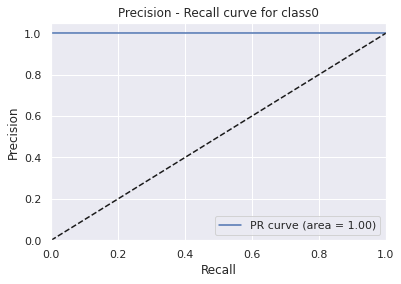

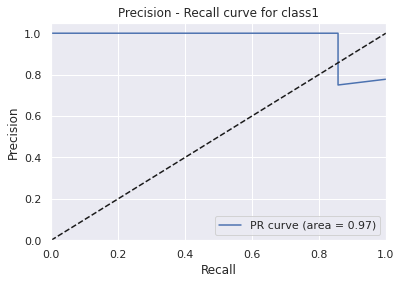

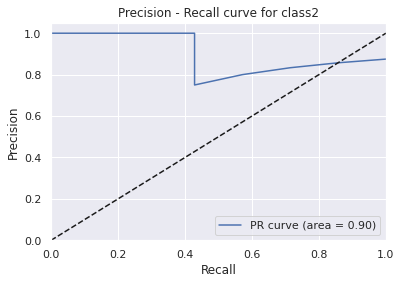

In [30]:
# precision recall curve
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_true[:, i],avg_ensemble_prob[:, i])
    pr_auc[i] = metrics.auc(recall[i], precision[i])

# Plot of a PR curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(recall[i], precision[i], label='PR curve (area = %0.2f)' % pr_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision - Recall curve for class'+str(i))
    plt.legend(loc="lower right")
    plt.show()

### Stack ensemble

In [32]:
stack=stack.reshape((stack.shape[0],stack.shape[1]*stack.shape[2]))

In [33]:
stack.shape

(21, 15)

In [34]:
from sklearn.linear_model import LogisticRegression
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(stack,labels)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
stack_ensemble_prob=softmax_reg.predict_proba(stack)
stack_ensemble_pred=softmax_reg.predict(stack)

In [36]:
print(metrics.classification_report(labels,stack_ensemble_pred,digits=3))

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000         7
         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         7

    accuracy                          1.000        21
   macro avg      1.000     1.000     1.000        21
weighted avg      1.000     1.000     1.000        21



### Confusion matrix

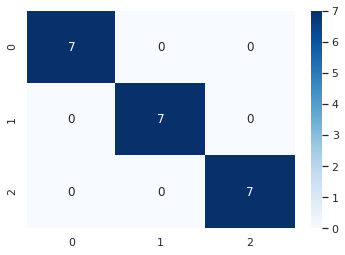

In [38]:
stack_cm=metrics.confusion_matrix(labels,stack_ensemble_pred)
sns.heatmap(stack_cm,annot=True,cmap='Blues')

### ROC curves

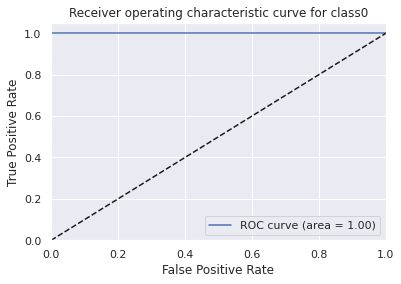

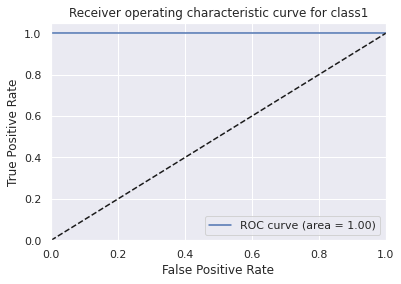

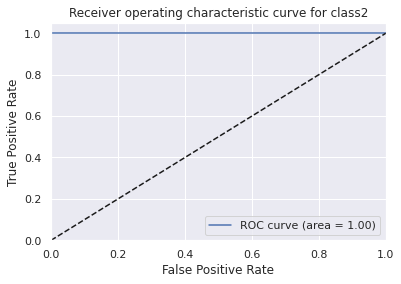

In [39]:
from sklearn.preprocessing import label_binarize
y_true = label_binarize(labels,classes=[0,1,2])

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_true[:, i], stack_ensemble_prob[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve for class'+str(i))
    plt.legend(loc="lower right")
    plt.show()

### Precision-Recall curves

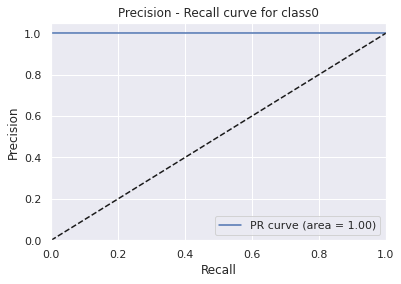

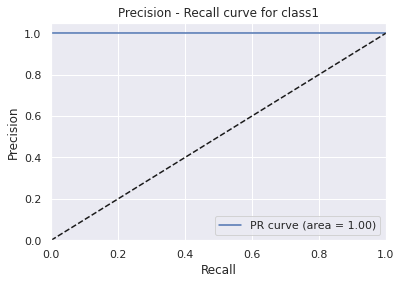

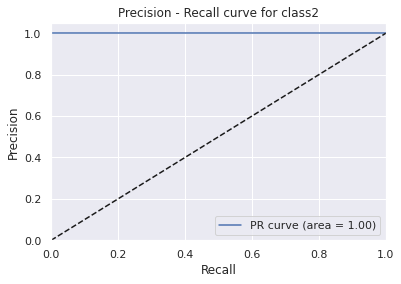

In [40]:
# precision recall curve
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_true[:, i],stack_ensemble_prob[:, i])
    pr_auc[i] = metrics.auc(recall[i], precision[i])

# Plot of a PR curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(recall[i], precision[i], label='PR curve (area = %0.2f)' % pr_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision - Recall curve for class'+str(i))
    plt.legend(loc="lower right")
    plt.show()

### We can see that the stack ensemble provides superior results when compared to the soft-voting classifier and the induvidual models. Hence, ensembles are a powerful way to produce robust results!